## Comparing Decision Tree and Linear Regression Algorithms 

There is a dataset on the number of bicycles people rent by the hour and day in Washington, D.C.
The data can be downloaded here: 
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The target column for prediction is  
'cnt' - The total number of bike rentals (casual + registered)

In this project, we will predict the total number of bikes people rented in a given hour. We will predict the cnt column using all of the other columns, except for casual and registered. 

I will apply two machine learning algorithms to compare results, which one would give us the more accurate prediction. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Loading the dataset: 
bike_rentals = pd.read_csv("bike_rental_hour.csv", parse_dates=["dteday"])
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Let us check the null values. The Regressions algorithms do not work if there are null values in the file: 

In [ ]:
bike_rentals.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

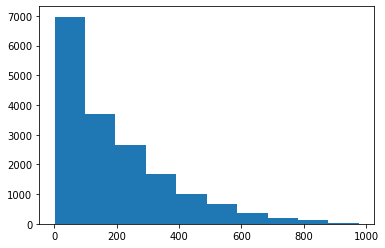

In [ ]:
# Display a histogram of our "cnt" column - total humber of bikes:
plt.hist(bike_rentals["cnt"])
plt.show()

In [ ]:
bike_rentals.corr(method='pearson')['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [ ]:
# Create a function to categorize the part of the day: morning - 1, afternoon -2,
# evening - 3, night -4:   
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
    

In [ ]:
#Let us apply the function to the 'hr' column of the dataframe:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [ ]:
bike_rentals["time_label"].isnull().sum()

0

In [ ]:
# Split the dataset on train and test datasets in proportion 80% :20 %

# The number of rows for 80% of total dataset: 
train_size = round(bike_rentals.shape[0] * .8)
print(train_size)



13903


In [ ]:
# Select a random sample to be the train dataframe
train = bike_rentals.sample(n=train_size, random_state=0)

In [ ]:
# The rest of the rows for the test dataset: 
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]


## Linear regression model



In [ ]:
# The features to train the model:
features = ["temp", "hum", "workingday", "yr", "time_label"]

In [ ]:
#Instantiate a linear regression model
lr = LinearRegression()

In [ ]:
# Fit the model using the train dataset
lr.fit(train[features], train["cnt"])

LinearRegression()

In [ ]:
# Predict for the test dataset:
predictions = lr.predict(test[features])

In [ ]:
# Calculate Root Mean Squared error: 
rmse = mean_squared_error(test["cnt"], predictions) ** 1/2 
print("RMSE value of the linear regression model:", round(rmse)) 

RMSE value of the linear regression model: 9936


In [ ]:
np.mean((predictions - test["cnt"]) ** 2)

19871.503260144833

The error is pretty high, so we'll try to apply the decision tree algorithm, 
maybe it will give us a more accurate result. 

## Decision tree algorithm

In [ ]:
r = DecisionTreeRegressor(min_samples_leaf=5)

r.fit(train[features], train["cnt"])

DecisionTreeRegressor(min_samples_leaf=5)

In [ ]:
predictions = r.predict(test[features])
# Calculate Root Mean Squared error: 
rmse = mean_squared_error(test["cnt"], predictions) ** 1/2 
print("RMSE value of decision tree:", round(rmse)) 

np.mean((predictions - test["cnt"]) ** 2)

RMSE value of decision tree: 7733


15466.381587356665

The error is still pretty big, but let us increase the number of the leaf nodes: 

In [ ]:
r = DecisionTreeRegressor(min_samples_leaf=50)

r.fit(train[features], train["cnt"])

DecisionTreeRegressor(min_samples_leaf=50)

In [ ]:
predictions = r.predict(test[features])
# Calculate Root Mean Squared error: 
rmse = mean_squared_error(test["cnt"], predictions) ** 1/2 
print("RMSE value of decision tree:", round(rmse))

RMSE value of decision tree: 7066


# Conclusion. 

### I applied the Liner Regression and the Decision Tree Algorithms to our dataset, and the Decision Tree algorithm gave us much more accurate results.